- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

#### Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

In [1]:
import pandas as pd
import numpy as np

In [13]:
orders = pd.read_csv('../data/Orders.csv')
returns = pd.read_csv('../data/Returns.csv')

#### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [ ]:
orders['Sales'] = orders['Sales'].str.replace('$', '')
orders['Sales'] = orders['Sales'].str.replace(',', '')
orders['Profit'] = orders['Profit'].str.replace('$', '')
orders['Profit'] = orders['Profit'].str.replace(',', '')

In [24]:
orders['Sales'] = orders['Sales'].astype('float')
orders['Profit'] = orders['Profit'].astype('float')

In [26]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


#### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [32]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format="%Y-%m-%d")

In [33]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [34]:
orders["Order.Month"] = pd.DatetimeIndex(orders["Order.Date"]).month

In [35]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11


In [58]:
orders["Order.Month"] = pd.DatetimeIndex(orders["Order.Date"]).month
orders["Order.Year"] = pd.DatetimeIndex(orders["Order.Date"]).year

In [60]:
orders = orders.sort_values(by = ['Order.Year','Order.Month'])

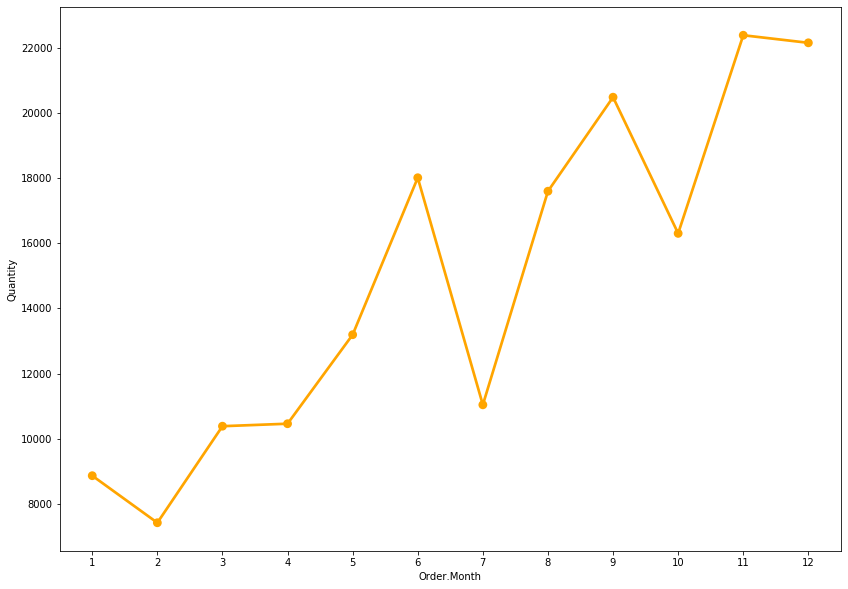

In [42]:
import seaborn as sns
fig = plt.figure(figsize=(14,10))
order = orders["Order.Month"].unique()
order_group =orders.groupby("Order.Month")["Quantity"].sum().reset_index()
sns.pointplot(order_group["Order.Month"],order_group["Quantity"],order=order,color="orange")

In [ ]:
# from Jan to Dec, general uptrend, 

In [ ]:
fig = plt.figure(figsize=(14,10))
sns.lineplot(data = orders, x = 'month', y = 'Quantity', hue = 'Category')

C:\Users\aznan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


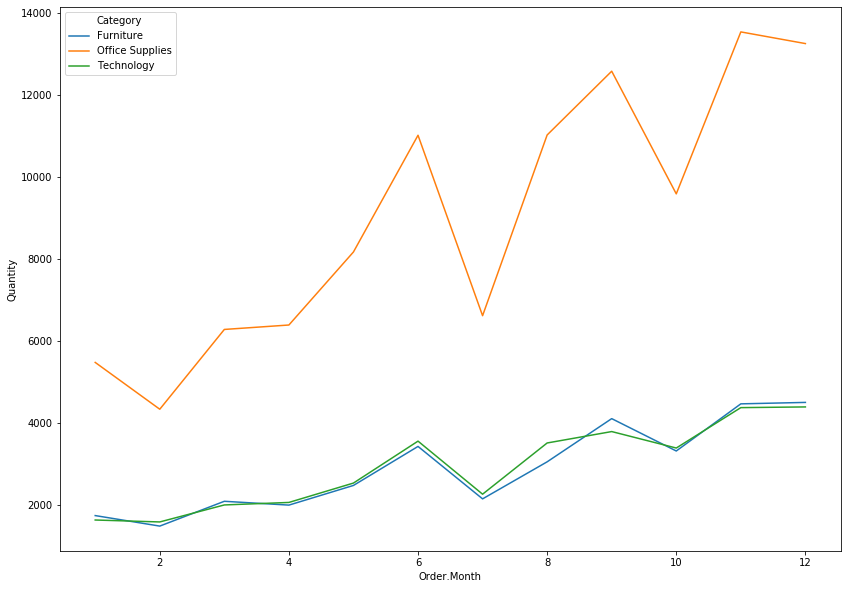

In [57]:
import seaborn as sns
fig = plt.figure(figsize=(14,10))
order_group = orders.groupby(["Order.Month", "Category"])["Category","Quantity"].sum().reset_index()
sns.lineplot(data = order_group, x = 'Order.Month', y = 'Quantity', hue = 'Category')

C:\Users\aznan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\aznan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\aznan\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\aznan\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



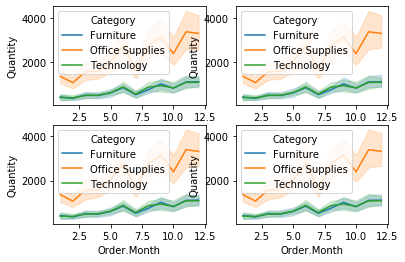

In [74]:
plt.subplot(2,2,1)
order_group1 = orders.groupby(["Order.Year", "Order.Month", "Category"])["Category","Quantity"].sum().reset_index()
orders = orders.sort_values(by = 'Order.Month')
order_group1[order_group1['Order.Year'] == 2012]
sns.lineplot(data = order_group1, x = 'Order.Month', y = 'Quantity', hue = 'Category')
plt.subplot(2,2,2)
order_group2 = orders.groupby(["Order.Year", "Order.Month", "Category"])["Category","Quantity"].sum().reset_index()
orders = orders.sort_values(by = 'Order.Month')
order_group2[order_group2['Order.Year'] == 2013]
sns.lineplot(data = order_group2, x = 'Order.Month', y = 'Quantity', hue = 'Category')
plt.subplot(2,2,3)
order_group3 = orders.groupby(["Order.Year", "Order.Month", "Category"])["Category","Quantity"].sum().reset_index()
orders = orders.sort_values(by = 'Order.Month')
order_group3[order_group3['Order.Year'] == 2014]
sns.lineplot(data = order_group3, x = 'Order.Month', y = 'Quantity', hue = 'Category')
plt.subplot(2,2,4)
order_group4 = orders.groupby(["Order.Year", "Order.Month", "Category"])["Category","Quantity"].sum().reset_index()
orders = orders.sort_values(by = 'Order.Month')
order_group4[order_group4['Order.Year'] == 2015]
sns.lineplot(data = order_group4, x = 'Order.Month', y = 'Quantity', hue = 'Category')

In [75]:
import plotly.express as px
order_test = orders.groupby(['Category','Order.Year','Order.Month'])['Quantity'].sum()
fig = px.line(order_test.reset_index(),x = 'Order.Month',y = 'Quantity',facet_col = 'Order.Year')
fig.show()

Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [82]:
len(orders['Order.ID'].unique())

25728

In [83]:
orders.shape

(51290, 26)

In [90]:
orders.loc[orders['Order.ID'] == 'AE-2015-GH4665138-42351']

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year
49469,43923,AE-2015-GH4665138-42351,2015-12-13,12/19/15,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,Binders,"Avery Binder Covers, Clear",3.16,1,0.7,-4.97,1.25,Medium,12,2015
49470,43927,AE-2015-GH4665138-42351,2015-12-13,12/19/15,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,Binders,"Avery Binder Covers, Recycled",3.43,1,0.7,-3.89,1.25,Medium,12,2015
29298,43924,AE-2015-GH4665138-42351,2015-12-13,12/19/15,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,Storage,"Eldon Lockers, Blue",59.37,1,0.7,-118.77,5.83,Medium,12,2015
33521,43922,AE-2015-GH4665138-42351,2015-12-13,12/19/15,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,Art,"BIC Pencil Sharpener, Water Color",77.26,8,0.7,-82.58,4.08,Medium,12,2015
40033,43925,AE-2015-GH4665138-42351,2015-12-13,12/19/15,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,Storage,"Rogers File Cart, Single Width",42.49,1,0.7,-62.33,2.24,Medium,12,2015
27486,43926,AE-2015-GH4665138-42351,2015-12-13,12/19/15,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,Phones,"Motorola Headset, VoIP",95.80,4,0.7,-156.56,6.73,Medium,12,2015


In [96]:
combined = pd.merge(orders, returns, left_on = ['Order.ID', 'Region'], right_on = ['Order ID', 'Region'], how = 'left')

In [100]:
pd.DataFrame(combined.groupby(['Order.Year', 'Returned'])['Profit'].sum()).reset_index()

,Order.Year,Returned,Profit
0,2012,Yes,17396.86
1,2013,Yes,9077.77
2,2014,Yes,17180.12
3,2015,Yes,17114.50


In [124]:
orders_returned = pd.DataFrame(combined.loc[combined['Returned']=='Yes'].groupby('Customer.ID')['Returned'].count()).reset_index()

In [127]:
orders_returned.loc[orders_returned['Returned'] > 1, ]

,Customer.ID,Returned
2,AA-1064559,3
5,AB-1001527,2
6,AB-10105101,3
8,AB-10165139,2
9,AB-1016545,6
...,...,...
1037,VD-2167059,2
1038,VF-2171527,4
1041,VM-218351404,2
1042,VM-2183551,3


In [131]:
orders_returned.loc[orders_returned['Returned'] > 5, ].reset_index(drop = True)

,Customer.ID,Returned
0,AB-1016545,6
1,AB-60086,6
2,AG-675117,6
3,AJ-1096031,8
4,AM-10705120,6
5,AT-1073545,7
6,BB-1154548,6
7,BF-111701404,6
8,BM-1114055,7
9,BP-110951404,7


In [132]:
orders_returned_region = pd.DataFrame(combined.loc[combined['Returned']=='Yes'].groupby('Region')['Returned'].count()).reset_index()

In [142]:
orders_returned_total = pd.DataFrame(combined.groupby('Region')['Row.ID'].count()).reset_index()

,Region,Row.ID
0,Canada,384
1,Caribbean,1690
2,Central Africa,643
3,Central America,5616
4,Central Asia,217


In [145]:
orders_ = pd.merge(orders_returned_region, orders_returned_total, how = 'inner', on = 'Region')
orders_['percent'] = orders_['Returned']/orders_['Row.ID']
orders_.sort_values('percent', ascending = False)

,Region,Returned,Row.ID,percent
21,Western US,177,3203,0.055261
6,Eastern Asia,131,2374,0.055181
16,Southern Europe,112,2113,0.053005
14,Southern Africa,25,478,0.052301
17,Southern US,83,1620,0.051235
8,Eastern US,134,2848,0.047051
13,Southeastern Asia,140,3129,0.044743
12,South America,133,2988,0.044511
19,Western Asia,108,2440,0.044262
11,Oceania,154,3487,0.044164


In [147]:
orders_category = pd.DataFrame(combined.loc[combined['Returned']=='Yes'].groupby('Sub.Category')['Returned'].count()).reset_index()

In [151]:
orders_category.head()

,Sub.Category,Returned
0,Accessories,137
1,Appliances,59
2,Art,216
3,Binders,263
4,Bookcases,103


In [150]:
orders_category_total = pd.DataFrame(combined.groupby('Sub.Category')['Row.ID'].count()).reset_index()
orders_category_total.head()

,Sub.Category,Row.ID
0,Accessories,3075
1,Appliances,1742
2,Art,4864
3,Binders,6146
4,Bookcases,2411


In [155]:
orders_2 = pd.merge(orders_category, orders_category_total, how = 'inner', on = 'Sub.Category')
orders_2['percent'] = orders_2['Returned']/orders_2['Row.ID']
orders_2.sort_values('percent', ascending = False)

,Sub.Category,Returned,Row.ID,percent
10,Labels,135,2601,0.051903
16,Tables,41,861,0.047619
0,Accessories,137,3075,0.044553
2,Art,216,4864,0.044408
6,Copiers,98,2223,0.044085
13,Phones,145,3357,0.043193
12,Paper,150,3492,0.042955
5,Chairs,147,3434,0.042807
9,Furnishings,135,3154,0.042803
3,Binders,263,6146,0.042792
